# Polynomial regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hyperparameters

In [2]:
POLYNOMIAL_DEGREE = 3
TOLERANCE = 1e-5
LEARNING_RATE = 0.5
REGULARIZATION = 0.01

## Initiate data

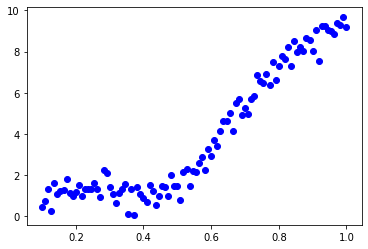

In [3]:
X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
y = np.sin(X) + 0.1*np.power(X,2) + 0.5*np.random.randn(100,1)
X /= np.max(X)

plt.plot(X, y, 'bo')

## Split data to train and test

In [4]:
order = np.random.permutation(len(X))
portion = 20
test_x = X[order[:portion]]
test_y = y[order[:portion]]
train_x = X[order[portion:]]
train_y = y[order[portion:]]

In [5]:
class PolynomialRegression():
    
    def __init__(self):
        self.w = np.random.randn(POLYNOMIAL_DEGREE + 1)
    
    def _get_gradient(self, w, x, y):
        y_estimate = x@w
        error = y.flatten() - y_estimate
        gradient = -(1.0 / len(x)) * error @ x + REGULARIZATION * w
        return gradient, error@error
    
    def _extend_data(self, train_x):
        x_data = np.ones_like(train_x)

        for i in range(1, POLYNOMIAL_DEGREE + 1):
            x_data = np.hstack((x_data, train_x**i))

        return x_data

    def fit(self, X, y, degree = 1, verbose = False):
        iterations = 1

        while True:
            x_data = self._extend_data(train_x)
            y_data = train_y

            gradient, error = self._get_gradient(self.w, x_data, train_y)
            new_w = self.w - LEARNING_RATE * gradient

            if np.sum(abs(new_w - self.w)) < TOLERANCE:
                break

            if verbose and iterations % 10 == 0:
                print("Iteration: %d - Error: %.4f" %(iterations, error))

            iterations += 1
            self.w = new_w
        
        return self
            
    def predict(self, X):
        print(self._extend_data(X).shape, self.w.shape)
        return self._extend_data(X)@self.w
        #X_plot = np.linspace(np.min(X), np.max(X), len(X))
        #y_plot = 0
        #for i in range(POLYNOMIAL_DEGREE+1):
        #    y_plot += X_plot**i*self.w[i]

In [6]:
model = PolynomialRegression()
model.fit(train_x, train_y, degree=1, verbose=True)

Iteration: 10 - Error: 125.7195
Iteration: 20 - Error: 71.7236
Iteration: 30 - Error: 60.0418
Iteration: 40 - Error: 56.9601
Iteration: 50 - Error: 55.9108
Iteration: 60 - Error: 55.4469
Iteration: 70 - Error: 55.1876
Iteration: 80 - Error: 55.0121
Iteration: 90 - Error: 54.8761
Iteration: 100 - Error: 54.7617
Iteration: 110 - Error: 54.6613
Iteration: 120 - Error: 54.5712
Iteration: 130 - Error: 54.4896
Iteration: 140 - Error: 54.4151
Iteration: 150 - Error: 54.3471
Iteration: 160 - Error: 54.2848
Iteration: 170 - Error: 54.2277
Iteration: 180 - Error: 54.1754
Iteration: 190 - Error: 54.1274
Iteration: 200 - Error: 54.0833
Iteration: 210 - Error: 54.0428
Iteration: 220 - Error: 54.0056
Iteration: 230 - Error: 53.9714
Iteration: 240 - Error: 53.9400
Iteration: 250 - Error: 53.9111
Iteration: 260 - Error: 53.8845
Iteration: 270 - Error: 53.8600
Iteration: 280 - Error: 53.8375
Iteration: 290 - Error: 53.8168
Iteration: 300 - Error: 53.7977
Iteration: 310 - Error: 53.7801
Iteration: 320 -

## Test using test data

(20, 4) (4,)


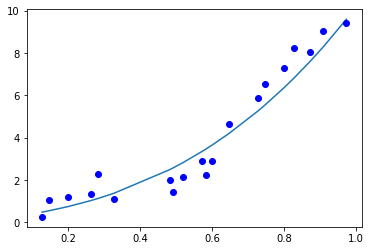

In [7]:
plt.plot(np.sort(test_x.flatten()), np.sort(model.predict(test_x)))
plt.plot(test_x, test_y, 'bo')